In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from skimage import exposure
import nose.tools
import scipy.misc
import scipy.ndimage
import skimage.filters
from skimage.segmentation import flood, flood_fill
import sys
from collections import deque

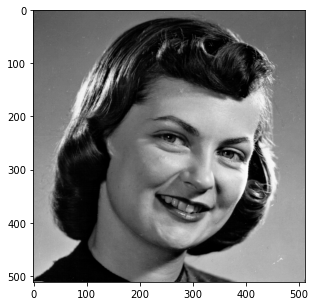

In [33]:

imageGirl = cv2.imread('Girl Face.png', 0)


plt.figure(figsize=(10,5))

plt.imshow(imageGirl, cmap='gray')
plt.show()

In [54]:

matrix=np.zeros_like(imageGirl,dtype="int")
matrix=imageGirl

def CompareBounds(x,y):
    max_y=matrix.shape[0]
    max_x=matrix.shape[1]
    if x>=0 and x<max_x and y>=0 and y<max_y:
        return True
    else:
        return False
    
#No usar, por su bien   

def RegionGrowing(md,seedx,seedy,nr,bv):
    if CompareBounds(seedx,seedy)==False: 
        return
    if bool_matrix[seedx,seedy]==1:
        return
    if int(abs(int(matrix[seedx,seedy])-bv))>md:
        return
    
    bool_matrix[seedx,seedy]=1
    region_matrix[seedx,seedy]=nr

       
    RegionGrowing(md,seedx+1,seedy,nr,matrix[seedx,seedy])
   
      
    RegionGrowing(md,seedx-1,seedy,nr,matrix[seedx,seedy])
   
        
    RegionGrowing(md,seedx,seedy+1,nr,matrix[seedx,seedy])
    
        
    RegionGrowing(md,seedx,seedy-1,nr,matrix[seedx,seedy])
    return

In [55]:
#Reinicio
region_matrix=np.zeros_like(imageGirl,dtype="int")
bool_matrix=np.zeros_like(imageGirl,dtype="int")

In [56]:
def RegionGrowingStack(sx,sy,md=22,nr=255):

    stack=deque()
    bv=matrix[sx,sy]
    stack.append([sx,sy])

    while stack:
        seedx,seedy=stack.popleft()
        if CompareBounds(seedx,seedy)==False: 
            continue
        if bool_matrix[seedx,seedy]==1:
            continue
        if int(abs(int(matrix[seedx,seedy])-bv))>md:
            continue
        bv=matrix[seedx,seedy]
        bool_matrix[seedx,seedy]=1
        region_matrix[seedx,seedy]=nr

        stack.appendleft([seedx-1,seedy])
        stack.appendleft([seedx+1,seedy])
        stack.appendleft([seedx,seedy-1])
        stack.appendleft([seedx,seedy+1])


In [57]:
RegionGrowingStack(12,12)
RegionGrowingStack(250,250)
RegionGrowingStack(500,500)

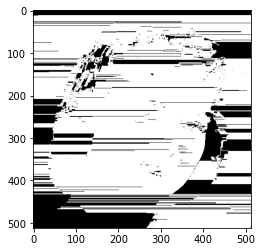

In [58]:
plt.figure()
plt.imshow(region_matrix,cmap="gray")
plt.show()